In [1]:
#Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [4]:
dataset = pd.read_csv("C:\\Users\jemmy\Desktop\data\data_sample.csv")
X = dataset.iloc[:, 1].values.reshape(-1,1)
y = dataset.iloc[:,2].values
dataset.head()

,Subject_ID,Learning_Hours,Salary
0,1,1.2,66000
1,2,1.3,60000
2,3,1.5,58000
3,4,1.6,70000
4,5,2.1,66000


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.linear_model import Lasso
regressor = Lasso()
regressor.fit(X_train, y_train)

Lasso()

In [6]:
w_0 = regressor.intercept_
w_1 = regressor.coef_

print('Interception : ', w_0)
print('Coeficient : ', w_1)

Interception :  5969.014421464875
Coeficient :  [26828.01718904]


In [7]:
score = regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.8301573368137914
Accuracy: 83.01573368137915%


In [8]:
y_pred = regressor.predict(X_test)

print('Predict : ', y_pred)

Predict :  [242055.565685   239372.76396609 279614.78974965 199130.73818254
 107915.47973981  46211.04020502 234007.16052829 306442.80693869
 164254.31583679 333270.82412773  62307.85051844 105232.6780209
 215227.54849596 268883.58287403 228641.55709048 271566.38459294
 252786.77256061  86453.06598858]


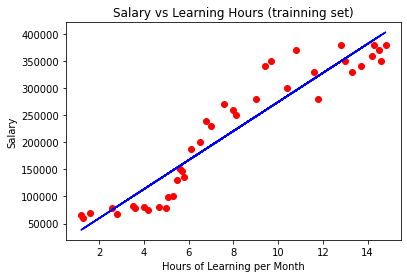

In [9]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Learning Hours (trainning set)')
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()

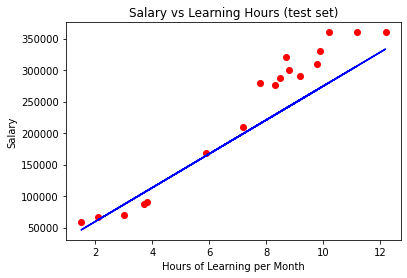

In [10]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Learning Hours (test set)')
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()

In [16]:
#Ridge

Interception :  6274.9293725239695
Coeficient :  [26789.23240919]
Score:  0.8297980873601308
Accuracy: 82.97980873601308%
Predict :  [242020.17457338 239341.25133247 279525.09994625 199157.40271868
 108074.01252744  46458.77798631 233983.40485063 306314.33235544
 164331.40058674 333103.56476463  62532.31743182 105395.08928652
 215230.9421642  268809.40698257 228625.55836879 271488.33022349
 252735.86753706  86642.62660009]


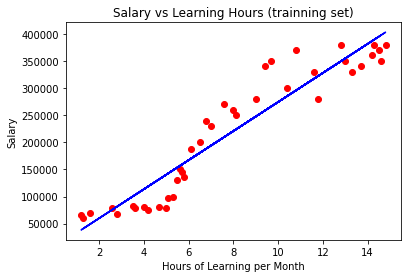

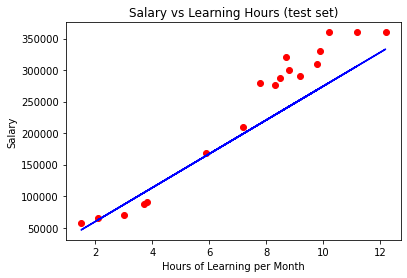

In [13]:
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(X_train, y_train)


w_0 = regressor.intercept_
w_1 = regressor.coef_

print('Interception : ', w_0)
print('Coeficient : ', w_1)


score = regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')



y_pred = regressor.predict(X_test)
print('Predict : ', y_pred)


plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Learning Hours (trainning set)')
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()


plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Learning Hours (test set)')
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()

Interception:  [5383.65220318]
Coeficient:  [26886.29633745]


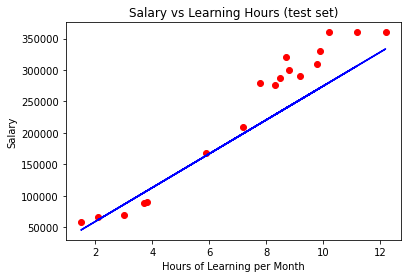

In [15]:
#Gradient Decent
alpha = 0.0001
trainning_repeats = 2000


w0 = 0
w1 = 0
errors = []


for j in range(trainning_repeats):
    
    squared_error_sum = 0
    
    error_sum_x = 0
    error_sum = 0
    
    for i in range(len(X_train)):
        predict = w0 + (X_train[i] * w1)
        
        squared_error_sum = squared_error_sum + (y_train - predict)**2
        
        error_sum = error_sum + y_train[i] - predict
        error_sum_x = error_sum_x + (y_train[i] - predict) * X_train[i]
        
    w0 = w0 + (alpha * error_sum)
    w1 = w1 + (alpha * error_sum_x)
    errors.append(squared_error_sum / len(X_train))
    
    
print('Interception: ', w0)
print('Coeficient: ', w1)

predicts_y = []
mean_error = 0
for i in range(len(X_test)):
    
    predict = w0 + (X_test[i] * w1)
    predicts_y.append(predict)

    
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, predicts_y, color = 'blue')
plt.title('Salary vs Learning Hours (test set)')
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()